In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Function Definitions

In [2]:
def get_pairs(arr):
    _, counts = np.unique(arr, return_counts=True)
    return np.sum(counts * (counts-1) / 2)

In [47]:
def get_l(board):
    return int(np.sqrt(board.shape[0]))

In [145]:
def get_total_pairs(board):
    pairs = 0
    l = get_l(board)
    for i in range(board.shape[0]):
        pairs += get_pairs(board[i])   
    for j in range(board.shape[1]):
        pairs += get_pairs(board[:,j])
    for sqi in range(l):
        for sqj in range(l):
            pairs += get_pairs(board[sqi*l:(sqi+1)*l,sqj*l:(sqj+1)*l])

    return pairs

In [49]:
def get_E(board):
    l = get_l(board)
    pairs = get_total_pairs(board)
    E = pairs / (3/2 * (l**4) * ((l**2) - 1))
    return E

In [4]:
def get_pairs_from_E(E,l):
    return E * (3/2 * (l**4) * ((l**2) - 1))

In [200]:
def metropolis_board(board, Tspace, Mspace):
    current_board=board.copy()
    l = int(np.sqrt(current_board.shape[0]))

    Es = []
    for idx,T in enumerate(Tspace):

        beta = 1/T if T!=0 else None

        for i in range(Mspace[idx]):

            i1,j1 = np.random.randint(0,l**2), np.random.randint(0,l**2)
            i2,j2 = np.random.randint(0,l**2), np.random.randint(0,l**2)
            val1 = current_board[i1,j1]
            val2 = current_board[i2,j2]

            E_before = get_E(current_board)

            current_board[i1,j1] = val2
            current_board[i2,j2] = val1

            E_after = get_E(current_board)

            A=1
            if E_before < E_after:
                if beta != None:
                    A=np.exp(-beta*(E_after-E_before))
                else:
                    A=0

            take = np.random.random() < A
            if not take:
                current_board[i1,j1] = val1
                current_board[i2,j2] = val2
                Es += [E_before]
            else:
                Es += [E_after]
    
    return current_board, np.array(Es)

In [209]:
def plot_alg(Es, Tspace, Mspace, log=False):
    plt.figure(dpi=130)
    ranges = np.cumsum([0]+Mspace)
    for i,T in enumerate(Tspace):
        plt.plot(range(ranges[i],ranges[i+1]),Es[ranges[i]:ranges[i+1]],".",label=f"T={T}")
    plt.xlabel(f"Step Number")
    plt.ylabel(r"E $\left[J\right]$")
    if log:
        plt.xscale('log')
    plt.grid()
    plt.legend()
    plt.show()

In [138]:
def get_board(l):
    return np.repeat(np.arange(1,l**2+1,1).reshape((1,l**2)),l**2,0)

# Board solutions

## $l=2$

In [148]:
boardl2 = get_board(l=2)
print(boardl2)
print(get_E(boardl2))
print(get_total_pairs(boardl2))

[[1 2 3 4]
 [1 2 3 4]
 [1 2 3 4]
 [1 2 3 4]]
0.4444444444444444
32.0


In [165]:
Tspace_l2_T0 = [0]
boardl2_ground_T0, Es_l2_T0 = metropolis_board(boardl2,Tspace_l2_T0,M=240) 

Init state E: 0.4444444444444444, ground state E: 0.05555555555555555
Init state pairs: 32.0, ground state pairs: 4.0


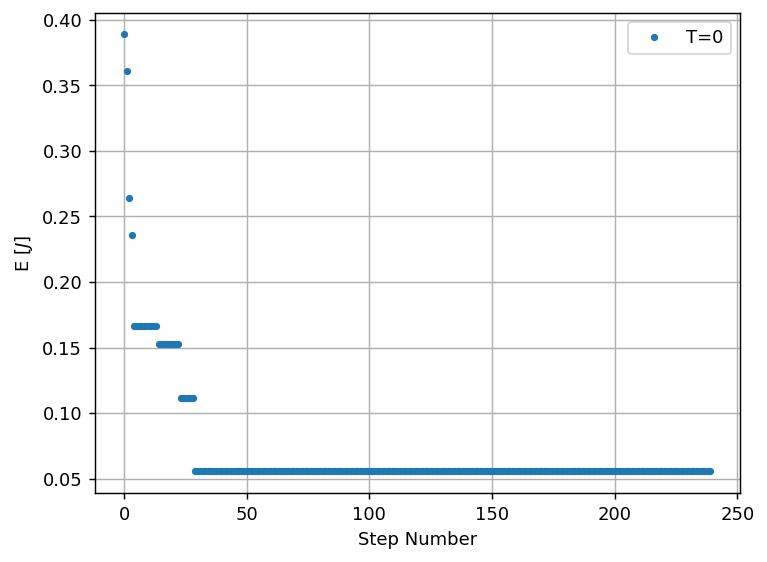

[[2 4 2 1]
 [1 3 3 4]
 [4 2 1 2]
 [3 1 4 3]]


In [166]:
print(f"Init state E: {get_E(boardl2)}, ground state E: {Es_l2_T0[-1]}")
print(f"Init state pairs: {get_total_pairs(boardl2)}, ground state pairs: {get_total_pairs(boardl2_ground_T0)}")
plot_alg(Es_l2_T0, Tspace_l2_T0)
print(boardl2_ground_T0)

In [155]:
Tspace_l2_T = [0.01,0.008,0.005]
boardl2_ground_T, Es_l2_T = metropolis_board(boardl2,Tspace_l2_T,M=240) 

Init state E: 0.4444444444444444, ground state E: 0.0
Init state pairs: 32.0, ground state pairs: 0.0


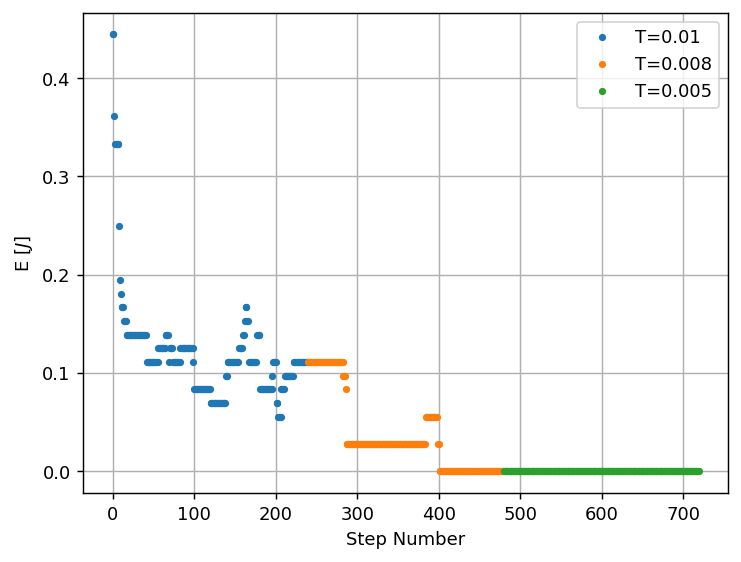

[[1 4 3 2]
 [3 2 4 1]
 [4 1 2 3]
 [2 3 1 4]]


In [156]:
print(f"Init state E: {get_E(boardl2)}, ground state E: {Es_l2_T[-1]}")
print(f"Init state pairs: {get_total_pairs(boardl2)}, ground state pairs: {get_total_pairs(boardl2_ground_T)}")
plot_alg(Es_l2_T, Tspace_l2_T)
print(boardl2_ground_T)

## $l=3$

In [ ]:
boardl3 = get_board(l=3)
print(boardl3)
print(get_E(boardl3))
print(get_total_pairs(boardl3))

[[1 2 3 4 5 6 7 8 9]
 [1 2 3 4 5 6 7 8 9]
 [1 2 3 4 5 6 7 8 9]
 [1 2 3 4 5 6 7 8 9]
 [1 2 3 4 5 6 7 8 9]
 [1 2 3 4 5 6 7 8 9]
 [1 2 3 4 5 6 7 8 9]
 [1 2 3 4 5 6 7 8 9]
 [1 2 3 4 5 6 7 8 9]]
0.4166666666666667
405.0


In [167]:
Tspace_l3_T0 = [0]
boardl3_ground_T0, Es_l3_T0 = metropolis_board(boardl3,Tspace_l3_T0,M=3240*2) 

Init state E: 0.4166666666666667, ground state E: 0.0102880658436214
Init state pairs: 405.0, ground state pairs: 10.0


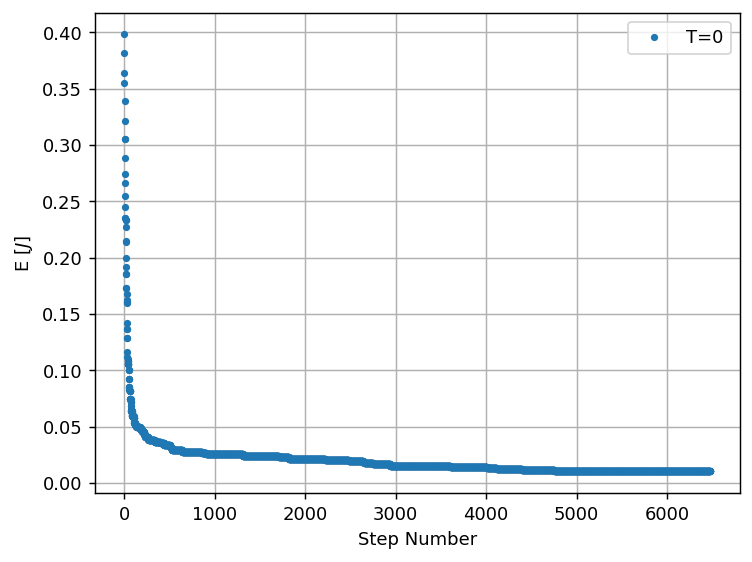

[[6 3 9 4 2 7 1 8 5]
 [5 1 4 8 6 2 3 7 9]
 [3 7 8 5 9 1 4 6 2]
 [3 4 5 2 1 9 6 7 8]
 [7 9 2 6 8 3 5 1 4]
 [6 8 1 7 5 4 9 2 3]
 [1 5 9 9 7 8 2 3 6]
 [4 2 3 1 4 6 8 5 7]
 [8 6 7 3 2 5 9 4 1]]


In [168]:
print(f"Init state E: {get_E(boardl3)}, ground state E: {Es_l3_T0[-1]}")
print(f"Init state pairs: {get_total_pairs(boardl3)}, ground state pairs: {get_total_pairs(boardl3_ground_T0)}")
plot_alg(Es_l3_T0, Tspace_l3_T0)
print(boardl3_ground_T0)

In [180]:
Tspace_l3_T = [0.01,0.001,0.0005,0.0001,0.00005]
boardl3_ground_T, Es_l3_T = metropolis_board(boardl3,Tspace_l3_T,M=3240*2) 

Init state E: 0.4166666666666667, ground state E: 0.0
Init state pairs: 405.0, ground state pairs: 0.0


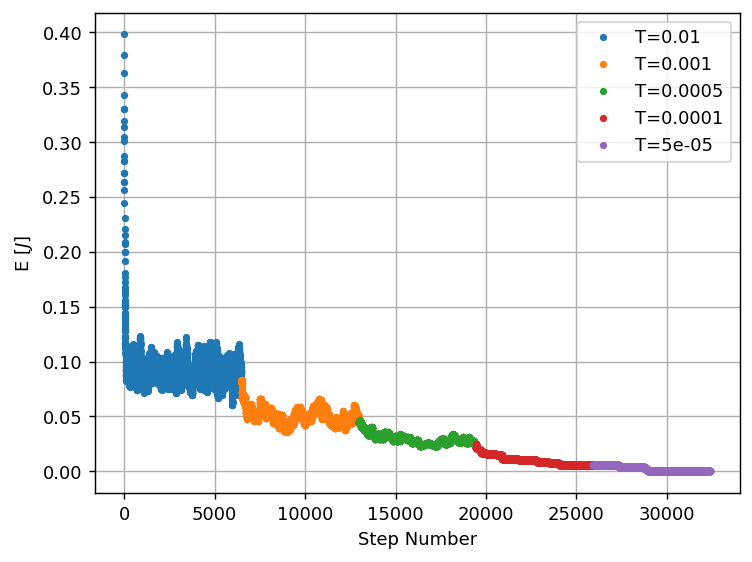

[[4 8 3 1 5 7 6 9 2]
 [9 7 2 4 6 8 5 1 3]
 [6 1 5 3 2 9 4 8 7]
 [2 3 4 5 9 1 7 6 8]
 [8 6 1 7 4 3 2 5 9]
 [7 5 9 6 8 2 3 4 1]
 [5 9 8 2 7 6 1 3 4]
 [3 2 6 8 1 4 9 7 5]
 [1 4 7 9 3 5 8 2 6]]


In [181]:
print(f"Init state E: {get_E(boardl3)}, ground state E: {Es_l3_T[-1]}")
print(f"Init state pairs: {get_total_pairs(boardl3)}, ground state pairs: {get_total_pairs(boardl3_ground_T)}")
plot_alg(Es_l3_T, Tspace_l3_T)
print(boardl3_ground_T)

## $l=4$

In [182]:
boardl4 = get_board(l=4)
print(boardl4)
print(get_E(boardl4))
print(get_total_pairs(boardl4))

[[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
 [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
 [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
 [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
 [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
 [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
 [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
 [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
 [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
 [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
 [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
 [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
 [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
 [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
 [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
 [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]]
0.4
2304.0


In [82]:
Tspace_l4_T0 = [0]
boardl4_ground_T0, Es_l4_T0 = metropolis_board(boardl4,Tspace_l4_T0,M=32640) 

Init state E: 0.4, ground state E: 0.013020833333333334
Init state pairs: 2304.0, ground state pairs: 152.0


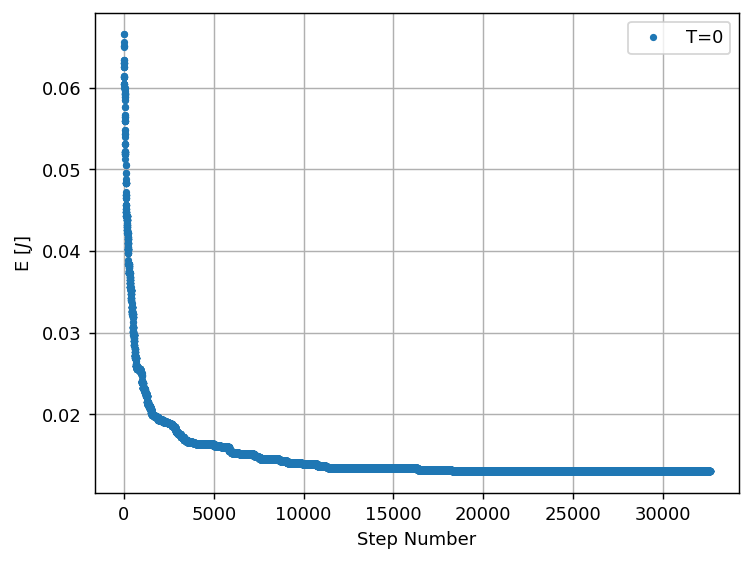

[[12 10  2 15 12  6  5  3 13  8  9  7 16 14  4  1]
 [11  8  6  1 14  9 15 12 16  3 12  5 10  7  7 13]
 [ 5  9 16 13 11  7  9 10  1  2  4 15  8  3 14 12]
 [14  4  3  7  8  2 13  1 11 10 14 12 12  5 15  9]
 [13  9  4  3 12  7 11  5 10  8 15  6 14 16 12  7]
 [15 16  1 14 15  8  2  9 14 13  7 11  3 10 12  4]
 [14  6  8  7 10 12  4 15  3  7  5 12 11  2 13  9]
 [11 12 10  2  7  3 14 13  4 12  9  1 15  5  6  8]
 [12  9 10  8 13 15 14  3  7  5  6 16  4 11 12  9]
 [12  7  5  7  4 15  8 10  2 11  1  9  3 14 13 16]
 [14  4  2 15  5  9  1 12 13  8  3 15 14  8 10  7]
 [ 3  6 13  9 12  7 16 11 12 14  8 10  2  5 15  1]
 [ 7 14 15  8  3  9 12  1  2 10 16 12  5 13  4  6]
 [ 5 11 10  4 13  7  2 12  9 15  3  6 12  8 14  1]
 [ 2  9 12  3 11  4 16 14  5  1 13  8 14 15 10  7]
 [13  1 16 12 15  5  8 10  4 12 14  7  9 11  7  3]]


In [187]:
print(f"Init state E: {get_E(boardl4)}, ground state E: {Es_l4_T0[-1]}")
print(f"Init state pairs: {get_total_pairs(boardl4)}, ground state pairs: {get_total_pairs(boardl4_ground_T0)}")
plot_alg(Es_l4_T0, Tspace_l4_T0)
print(boardl4_ground_T0)

In [219]:
Tspace_l4_T = [5e-2,5e-4,3e-4,1e-4,5e-5,1e-5,5e-6,1e-6,5e-7,1e-7]
Mspace_l4_T = [1000,1000,1000,2000,2000,2000,2000,2000,2000,10000]
boardl4_ground_T, Es_l4_T = metropolis_board(boardl4,Tspace_l4_T,Mspace=Mspace_l4_T) 

Init state E: 0.4, ground state E: 0.007118055555555555
Init state pairs: 2304.0, ground state pairs: 41.0


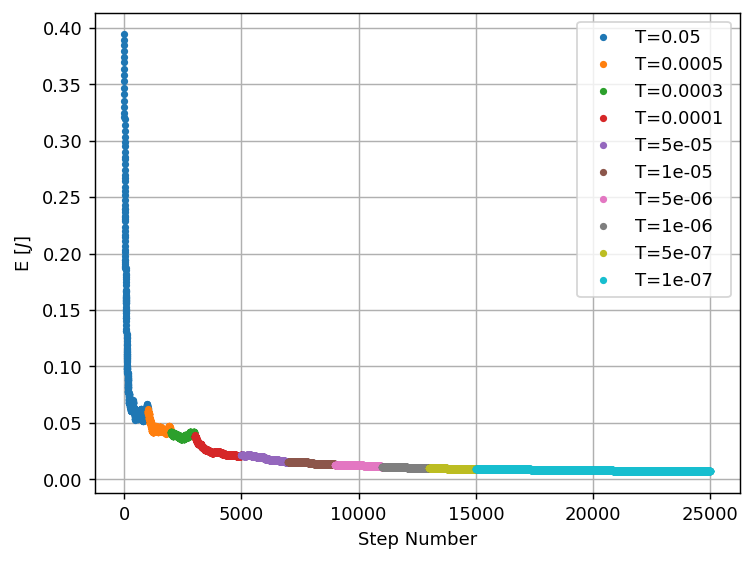

[[ 5  4  1  7 15  8 13 12 11  2  3  9 16 13  6 14]
 [ 2 11  8 16  1  5 14  9 10  6 16 15  4 12  3  7]
 [14 12  6  9 11  3 16  4  7  1  5 13 15  2  8 10]
 [ 3 10 15 13  6  7 10  2  8 14 12  4  1  9 11  5]
 [ 6  1  9  5 14  2  7  8 13 12 10 11  3 15  4 16]
 [11  2 16  8 12  4 15  3  6  7 14  9 10  5 13  1]
 [10 13  7 14  3 16 11  6  5 15  1  4  2  8 12  9]
 [12  3  4 10  9  1 13  5 15  8  2 16  7  6 14 11]
 [13  3 11  4  4  9  1 10 12 15  8 14  5  7 16  6]
 [ 1 16  5 15  2 12  8  7  3 11  9 10 14  6 13  3]
 [ 7  8  3  2 10 15  6 14  4  5 13  1  2 11 16 12]
 [15 14 12  6  8 11  5 13 16  3  7  2  9  1 10  4]
 [ 4 12  2  1 16  8  9 15 14  3 11  5 13 10  7  6]
 [ 5  9 14  3  6 10  2 11  1 16 15  8 12  4  9 13]
 [16  7  6 11  7 13 12  1  2  9  4  6  8 14  5 15]
 [ 8 15 13 10  5 14  4  3  9 10  7 12 11 16  1  2]]


In [220]:
print(f"Init state E: {get_E(boardl4)}, ground state E: {Es_l4_T[-1]}")
print(f"Init state pairs: {get_total_pairs(boardl4)}, ground state pairs: {get_total_pairs(boardl4_ground_T)}")
plot_alg(Es_l4_T, Tspace_l4_T, Mspace_l4_T)
print(boardl4_ground_T)